In [1]:

import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('/Users/LAPT0084/Documents/PhD/Objective 4 -  Integration through schools/DOS_code/School_Network_Analysis')

import pandas as pd
import numpy as np
import make_network as mn
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib

%matplotlib inline

In [2]:
vo_frame = pd.read_csv('vo_jan2013.csv')

In [3]:
onder = [v for v in vo_frame.onderwijsstructuur]

In [4]:
'MAVO' in onder[0]

True

In [5]:
[[v[0], v[0].count('/')+ 1]  for v in np.vstack(vo_frame.onderwijsstructuur.unique())]

[['VBO/MAVO/HAVO/VWO', 4],
 ['MAVO', 1],
 ['MAVO/HAVO/VWO', 3],
 ['VBO', 1],
 ['VBO/MAVO/HAVO', 3],
 ['HAVO/VWO', 2],
 ['VBO/MAVO', 2],
 ['MAVO/HAVO/VWO/PRO', 4],
 ['BRUGJAAR', 1],
 ['PRO', 1],
 ['                              ', 1],
 ['MAVO/VWO', 2],
 ['VWO', 1],
 ['HAVO', 1],
 ['VBO/PRO', 2],
 ['VBO/MAVO/HAVO/VWO/PRO', 5],
 ['VBO/MAVO/VWO', 3],
 ['MAVO/HAVO', 2],
 ['VBO/MAVO/PRO', 3],
 ['MAVO/PRO', 2],
 ['VBO/VWO', 2]]

In [6]:
vo_frame['no_teirs'] = [v[0].count('/') + 1.  for v in np.vstack(vo_frame.onderwijsstructuur)]

In [8]:
net = mn.build_network_alinks().subgraph(nbunch=vo_frame.vestigingsnummer)
                    

In [9]:
degree = pd.DataFrame.from_dict(net.degree(weight='weight'), orient='index',  columns=['Degree']).reset_index().rename(columns={'index':'vestigingsnummer'})

In [10]:
vo_frame = vo_frame.merge(degree, on='vestigingsnummer')

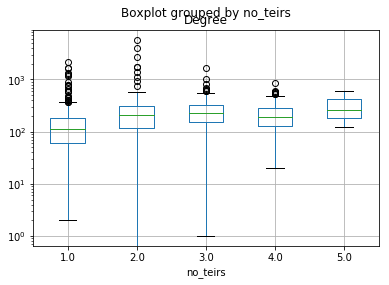

In [11]:
vo_frame.boxplot('Degree', by='no_teirs')
plt.yscale('log')

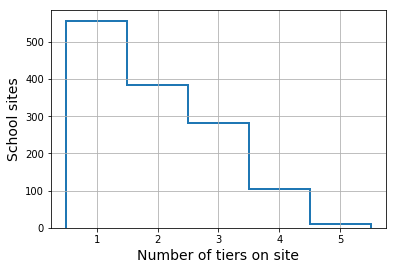

In [12]:
vo_frame.no_teirs.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], histtype='step', linewidth=2.)
plt.xlabel('Number of tiers on site', fontsize=14)
plt.ylabel('School sites', fontsize=14)

In [13]:
vo_frame['deg_per_st'] = vo_frame.Degree / (1.*vo_frame.leerlingen)

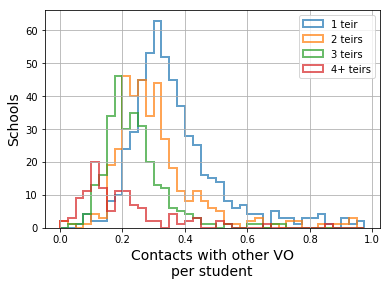

In [14]:
vo_frame.query('no_teirs == 1').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 2').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 3').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs >= 4').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)
#vo_frame.query('no_teirs > 4').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)

plt.legend(['1 teir','2 teirs','3 teirs','4+ teirs'])
plt.xlabel('Contacts with other VO\nper student', fontsize=14)
plt.ylabel('Schools', fontsize=14)

#plt.xlim([0,2.5])

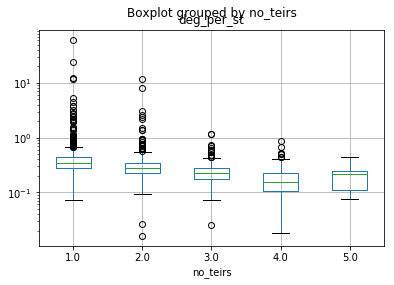

In [15]:
vo_frame.boxplot('deg_per_st', by='no_teirs')
plt.yscale('log')

In [16]:
type(vo_frame.leerlingen[0])

numpy.int64

In [17]:
net_all = mn.build_network_alinks()
degree_all = pd.DataFrame.from_dict(net_all.degree(weight='weight'), orient='index',  columns=['Degree_all']).reset_index().rename(columns={'index':'vestigingsnummer'})

In [18]:
vo_frame = vo_frame.merge(degree_all, on='vestigingsnummer')

In [19]:
vo_frame['deg_per_st_all'] = vo_frame.Degree_all / (1.*vo_frame.leerlingen)

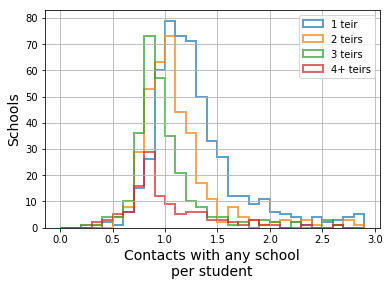

In [20]:
vo_frame.query('no_teirs == 1').deg_per_st_all.hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 2').deg_per_st_all.hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 3').deg_per_st_all.hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs >= 4').deg_per_st_all.hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
#vo_frame.query('no_teirs > 4').deg_per_st_all.hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)

plt.legend(['1 teir','2 teirs','3 teirs','4+ teirs'])
plt.xlabel('Contacts with any school\nper student', fontsize=14)
plt.ylabel('Schools', fontsize=14)

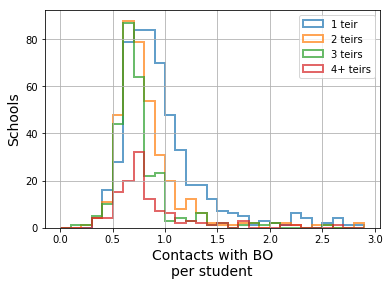

In [21]:
(vo_frame.query('no_teirs == 1').deg_per_st_all - vo_frame.query('no_teirs == 1').deg_per_st).hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
(vo_frame.query('no_teirs == 2').deg_per_st_all- vo_frame.query('no_teirs == 2').deg_per_st).hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
(vo_frame.query('no_teirs == 3').deg_per_st_all- vo_frame.query('no_teirs == 3').deg_per_st).hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
(vo_frame.query('no_teirs >= 4').deg_per_st_all- vo_frame.query('no_teirs >= 4').deg_per_st).hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)
#vo_frame.query('no_teirs > 4').deg_per_st_all.hist(bins=np.arange(0,3,0.1), alpha=0.7, histtype='step', linewidth=2.)

plt.legend(['1 teir','2 teirs','3 teirs','4+ teirs'])
plt.xlabel('Contacts with BO\nper student', fontsize=14)
plt.ylabel('Schools', fontsize=14)

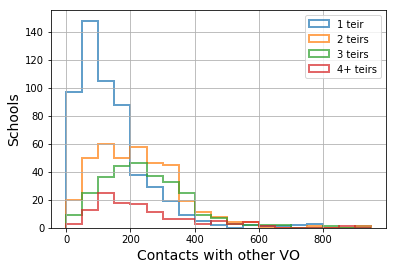

In [22]:
vo_frame.query('no_teirs == 1').Degree.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 2').Degree.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 3').Degree.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs >= 4').Degree.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
#vo_frame.query('no_teirs > 4').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)

plt.legend(['1 teir','2 teirs','3 teirs','4+ teirs'])
plt.xlabel('Contacts with other VO', fontsize=14)
plt.ylabel('Schools', fontsize=14)

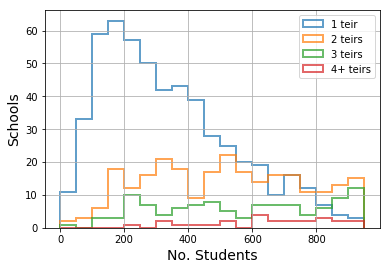

In [23]:
vo_frame.query('no_teirs == 1').leerlingen.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 2').leerlingen.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs == 3').leerlingen.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
vo_frame.query('no_teirs >= 4').leerlingen.hist(bins=np.arange(0,1000,50), alpha=0.7, histtype='step', linewidth=2.)
#vo_frame.query('no_teirs > 4').deg_per_st.hist(bins=np.arange(0,1,0.025), alpha=0.7, histtype='step', linewidth=2.)

plt.legend(['1 teir','2 teirs','3 teirs','4+ teirs'])
plt.xlabel('No. Students', fontsize=14)
plt.ylabel('Schools', fontsize=14)